The Titanic dataset is a classic dataset used for machine learning and data analysis. It contains information about passengers who were aboard the RMS Titanic when it sank on its maiden voyage in 1912, including whether they survived or not. The dataset includes features such as passenger class, sex, age, siblings/spouses aboard, parents/children aboard, ticket number, fare, cabin number, and port of embarkation.

Researchers and data scientists often use this dataset to explore various aspects of the Titanic tragedy, such as the demographics of the passengers, factors that affected survival rates. It is a popular dataset for beginners in data science due to its relative simplicity.

**Column Profiling:**
1. **PassengerId:**
*     Data type: Integer
*     Unique values: Identifies each passenger uniquely.
2. **Survived:**
*   Data type: Integer (0 or 1)
*    Distribution: Number of passengers who survived (1) vs. those who did not (0). 
3. **Pclass:**
*    Data type: Integer (1, 2, or 3)
*    Distribution: Distribution of passengers across different classes (1st, 2nd, 3rd).
4. **Name:**
*    Data type: String
*    Unique values: Each value is unique.
5. **Sex:**
*    Data type: String (male or female)
*    Distribution: Number of male vs. female passengers.
*    Summary: Gender of the passenger.
6. **Age:**
*    Data type: Float
*    Missing values: Number of missing values.
*    Summary: Age of the passenger.
7. **SibSp:**
*    Data type: Integer
*    Distribution: Number of siblings/spouses aboard.
*    Summary: Indicates the presence of siblings or spouses.
8. **Parch:**
*    Data type: Integer
*    Distribution: Number of parents/children aboard.
*    Summary: Indicates the presence of parents or children.
9. **Ticket:**
*    Data type: String
*    Unique values: Number of unique ticket numbers.
*    Summary: Ticket number of the passenger.
10. **Fare:**
*    Data type: Float
*    Summary: Fare paid by the passenger.
11. **Cabin:**
*    Data type: String
*    Missing values: Number of missing values.
*    Summary: Cabin number of the passenger.
12. **Embarked:**
*    Data type: String Category (C, Q, S)
*    Distribution: Number of passengers embarked at each port.
*    Missing values: Number of missing values.
*    Summary: Port of embarkation.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from sklearn.impute import SimpleImputer
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Importing the Dataset & performing simple EDA

In [2]:
titanic = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# shape of the dataset
titanic.shape

(891, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Missing Values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Missing values (in percent)
titanic.isnull().sum()/len(titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

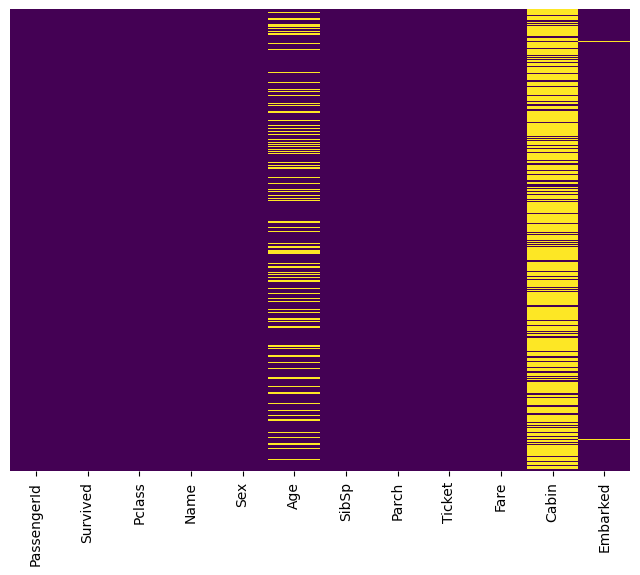

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(titanic.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [8]:
# Describing the numerical & datetime values
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Describing the numerical & datetime values
titanic.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


### Inference
* The dataset has a shape of (891, 12).
* There are 3 columns with missing values: Age, Cabin, and Embarked.
* We can handle missing values for Age and Embarked. However, since around 77.1% of rows are missing for Cabin, it would be wise to remove that column, as it does not impact the label column.
* We can also remove the PassengerId, Ticket and Name columns.
* Since there are only two rows with null values for the 'Embarked' column (i.e., 0.22% of dataset), we can safely remove them.

## Dealing with Null Values and Dropping Unnecessary Columns

In [10]:
titanic.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [11]:
titanic.dropna(subset=['Embarked'],inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


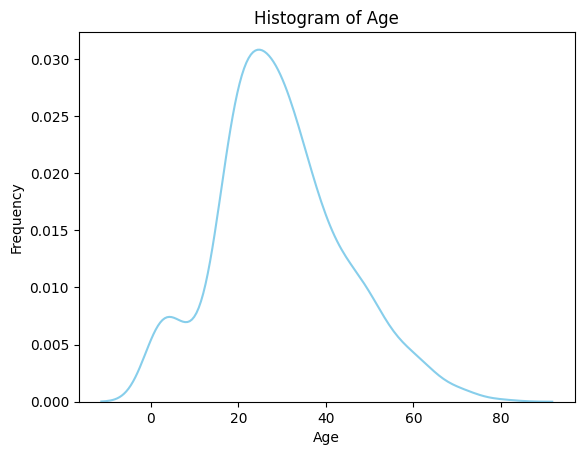

In [12]:
# Inorder to replace null values in Age column, we can draw boxplot or kdeplot
sns.kdeplot(data=titanic, x='Age', color='skyblue')  
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

### Inference
The distribution appears to be right-skewed, so it would be more appropriate to use the median instead of the mean.

In [13]:
imputer = SimpleImputer(strategy='median')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])

In [14]:
# Missing Values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


### Dealing with Outliers

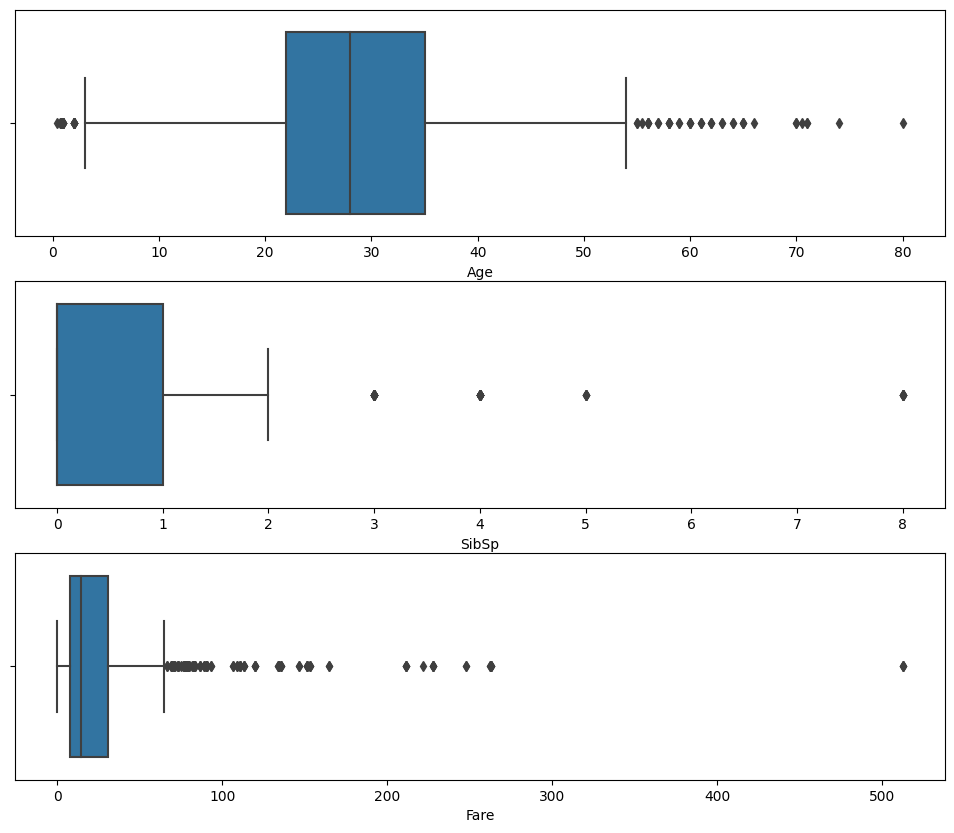

In [15]:
fig, axis = plt.subplots(nrows=3,ncols=1,figsize=(12, 10))

sns.boxplot(data=titanic, x="Age", ax=axis[0])
sns.boxplot(data=titanic, x="SibSp", ax=axis[1])
sns.boxplot(data=titanic, x="Fare", ax=axis[2])
plt.show()

### Inference
Both the 'Fare' and 'SibSp' columns exhibit the most outliers. However, for the 'Fare' column, it is important to note that the highest fare was paid by a male and a female, both from Class 1. These individuals likely had the means to pay high fares, so their values should not be considered outliers solely based on the fare amount.

## Univariate Analysis

### Pclass Column

In [16]:
titanic['Pclass'].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

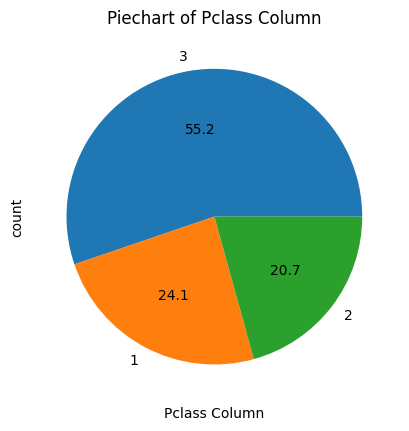

In [17]:
titanic['Pclass'].value_counts().plot(kind='pie',autopct="%.1f")
plt.xlabel('Pclass Column')
plt.title('Piechart of Pclass Column')
plt.show()

### Sex Column

In [18]:
titanic['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

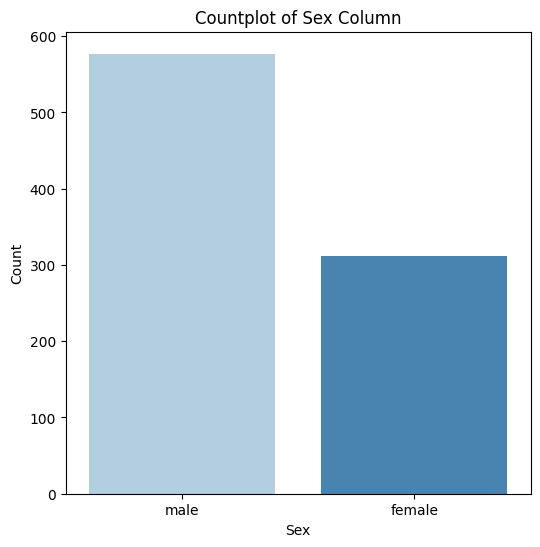

In [19]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Sex', data=titanic, palette='Blues')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Countplot of Sex Column')
plt.show()

### Age Column

In [20]:
titanic['Age_Category']=pd.cut(titanic['Age'],bins=[17,29,39,50],labels=['Young','Mid-aged','Old'])

titanic['Age_Category'].value_counts()

Age_Category
Young       448
Mid-aged    166
Old          99
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


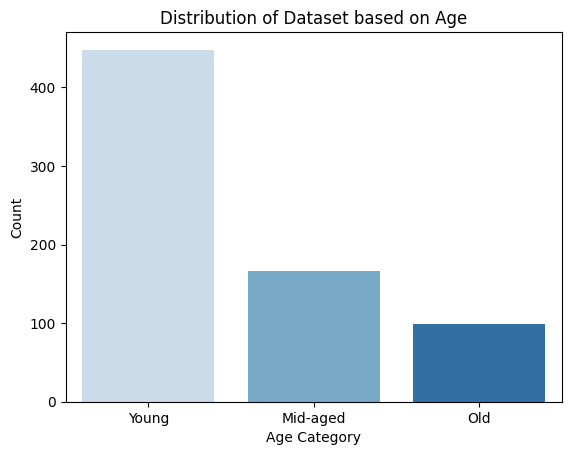

In [21]:
sns.countplot(x='Age_Category', data=titanic, palette='Blues')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Dataset based on Age')
plt.show()

### Embarked Column

In [22]:
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

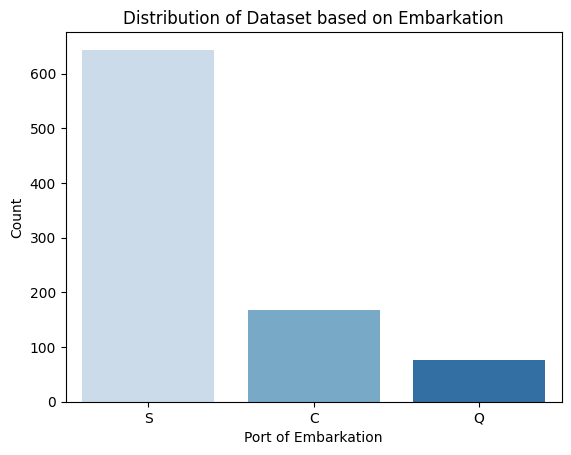

In [23]:
sns.countplot(x='Embarked', data=titanic, palette='Blues')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.title('Distribution of Dataset based on Embarkation')
plt.show()

### Inference
* Most of the people came from the 3rd class, accounting for 55.2% of the total, followed by the 1st class at 24.1% and the 2nd class at 20.7%.
* The majority of the people are male, constituting 64.9% (577/889) of the total passengers.
* Based on the age category column, the majority of passengers were young, representing 50.4% (448/889) of the total.
* Most of the passengers embarked from Southampton, comprising 72.5% (644/889) of the total.